<div dir=rtl align=center>

<img src='https://upload.wikimedia.org/wikipedia/fa/thumb/a/a9/Sharif_logo.svg/626px-Sharif_logo.svg.png?20110526112825' alt="SUT logo" width=200 height=200 align=center  >
<br>
<font face="B Yekan">
<font color=0F5298 size=7>
یادگیری ماشین<br>
<font color=2565AE size=5>
دانشکده مهندسی صنایع<br>
<font color=2565AE size=4>
دکتر مهدی شریف زاده <br>
<font  size=4>
 امیرحسین محمودی <br>
بهار 1402<br>

<font color=3C99D size=5>
درخت تصمیم
<br>
    
    
    
____


# Decision Trees

we will start by discussing how to train, validate, and make predictions with decision trees. Then we will go through the CART training algorithm used by `Scikit-Learn`, we will discuss how to regularize trees and use them in regression tasks. Finally, we will discuss some of the limitations of decision trees.

## Training & Visualizing a Decision Tree

To understand decision trees, let's start by building one and taking a look at its predictions.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()

In [3]:
X = iris.data[:, 2:]  # Petal length and width
y = iris.target
X.shape, y.shape

((150, 2), (150,))

In [4]:
tree_clf = DecisionTreeClassifier(max_depth=2)

In [5]:
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

We can visualize the decision tree by using the `export_graphiz()` method to export a graph representation file then taking a look at it:

[Text(0.4, 0.8333333333333334, 'x[1] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'x[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

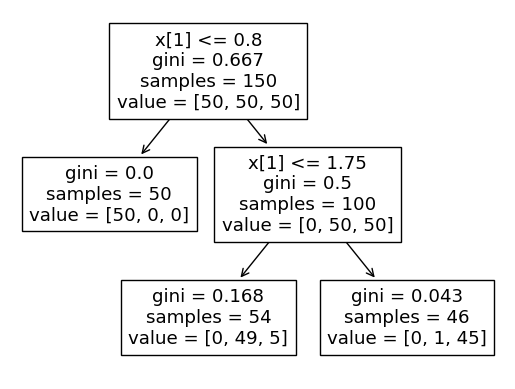

In [6]:
from sklearn import tree
tree.plot_tree(tree_clf)

In [7]:
! pip install graphviz


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\HP OMEN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
from sklearn.tree import export_graphviz
import graphviz 


In [9]:
dot_data = export_graphviz(tree_clf, 
                out_file='iris_tree.dot', 
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

Let's convert the graph file into a .png file:

In [10]:
! dot -Tpng iris_tree.dot -o static/imgs/iris_tree.png

And here it is:

<div style="text-align:center"><img style="width:33%" src="static/imgs/iris_tree.png"></div>

In [11]:
dot_data = export_graphviz(tree_clf, 
                out_file=None, 
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

graph = graphviz.Source(dot_data) 
graph.render("iris_tree") 

'iris_tree.pdf'

In [12]:
! pip install dtreeviz


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\HP OMEN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
import dtreeviz

In [14]:
viz_model = dtreeviz.model(tree_clf, X, y,
                target_name="species",
                feature_names=iris.feature_names[2:],
            class_names=list(iris.target_names))


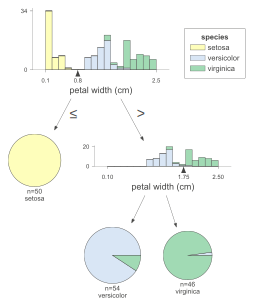

In [15]:
viz_model.view()     # render as SVG into internal object 

In [16]:
v=viz_model.view()
#v.show()                 # pop up window
v.save("iris.svg")  # optionally save as svg

## Making Predictions

To classify a new data point, we start at the root node of the graph (on the top), and we answer the binary questions and we reach the end leaf. That end leaf represents your class.

One of the many qualities of decision trees is that they require very little data preparation. In fact, they don't require feature scaling or centering at all!

A tree node has the following attributes:
- `samples`: counts how many training instances are sitting on the node.
- `value`: tells us how many instances of each class are setting on the node.
- `gini`: measures the nodes impurity (pure == 0)

The following equation shows how the training algorithm computes the gini scores of the ith node:

$$G_i=1-\sum_{k=1}^n{p_{i,k}}^2$$

Where $p_{i,k}$ is the ratio of class $k$ instances among the training instances in that particular node. In our case: $k \in \{1,2,3\}$.

`Scikit-learn` uses the CART algorithm, which produces only binary trees. Non-leaf nodes only have two children.

However, other algorithms such as ID3 can produce decision trees with nodes that have more than 2 children.

The following figure shows the decision boundaries of our decision tree (Decision Trees tend to create lines/rectangles/boxes/.. and split the feature space linearly but iteratively):
 
<div style="text-align:center"><img style="width:50%" src="static/imgs/decision_tree_boundaries.png"></div>

All in all, decision Trees are intuitive, and their predictions are easily interpretable. These types of models are called **white box** models.

In contrast, as we will see, Random Forests and Neural Networks are generally considered Black Box models.

## Estimating Class Probabilities

A decision tree can also estimate the probability that a certain instance belongs to a certain class. It just returns the ratio of that class over the sum of all instances in the leaf.

Let's check this in scikit-learn:

In [17]:
sample_x=[5,1.5]

In [18]:
tree_clf.predict_proba([sample_x])

array([[0.        , 0.90740741, 0.09259259]])

In [19]:
tree_clf.predict([sample_x])

array([1])

In [20]:
viz_model.explain_prediction_path(sample_x)

'0.8 <= petal width (cm)  < 1.75\n'

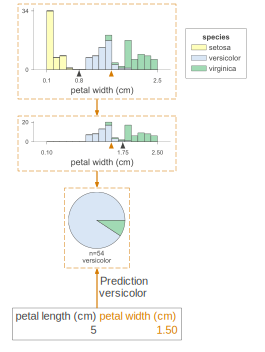

In [21]:
viz_model.view(x=sample_x,show_just_path=True)

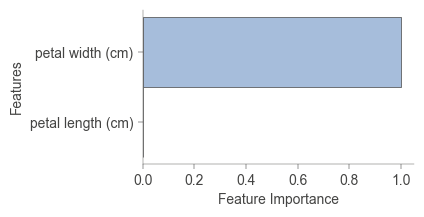

In [22]:
viz_model.instance_feature_importance(sample_x, figsize=(3.5,2))

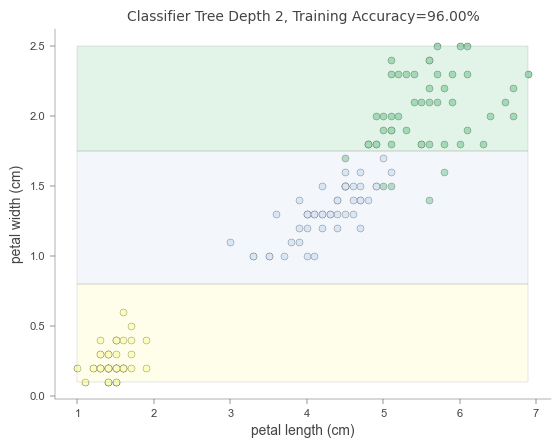

In [23]:
viz_model.ctree_feature_space(show={'splits','title'},
                               features=iris.feature_names[2:])

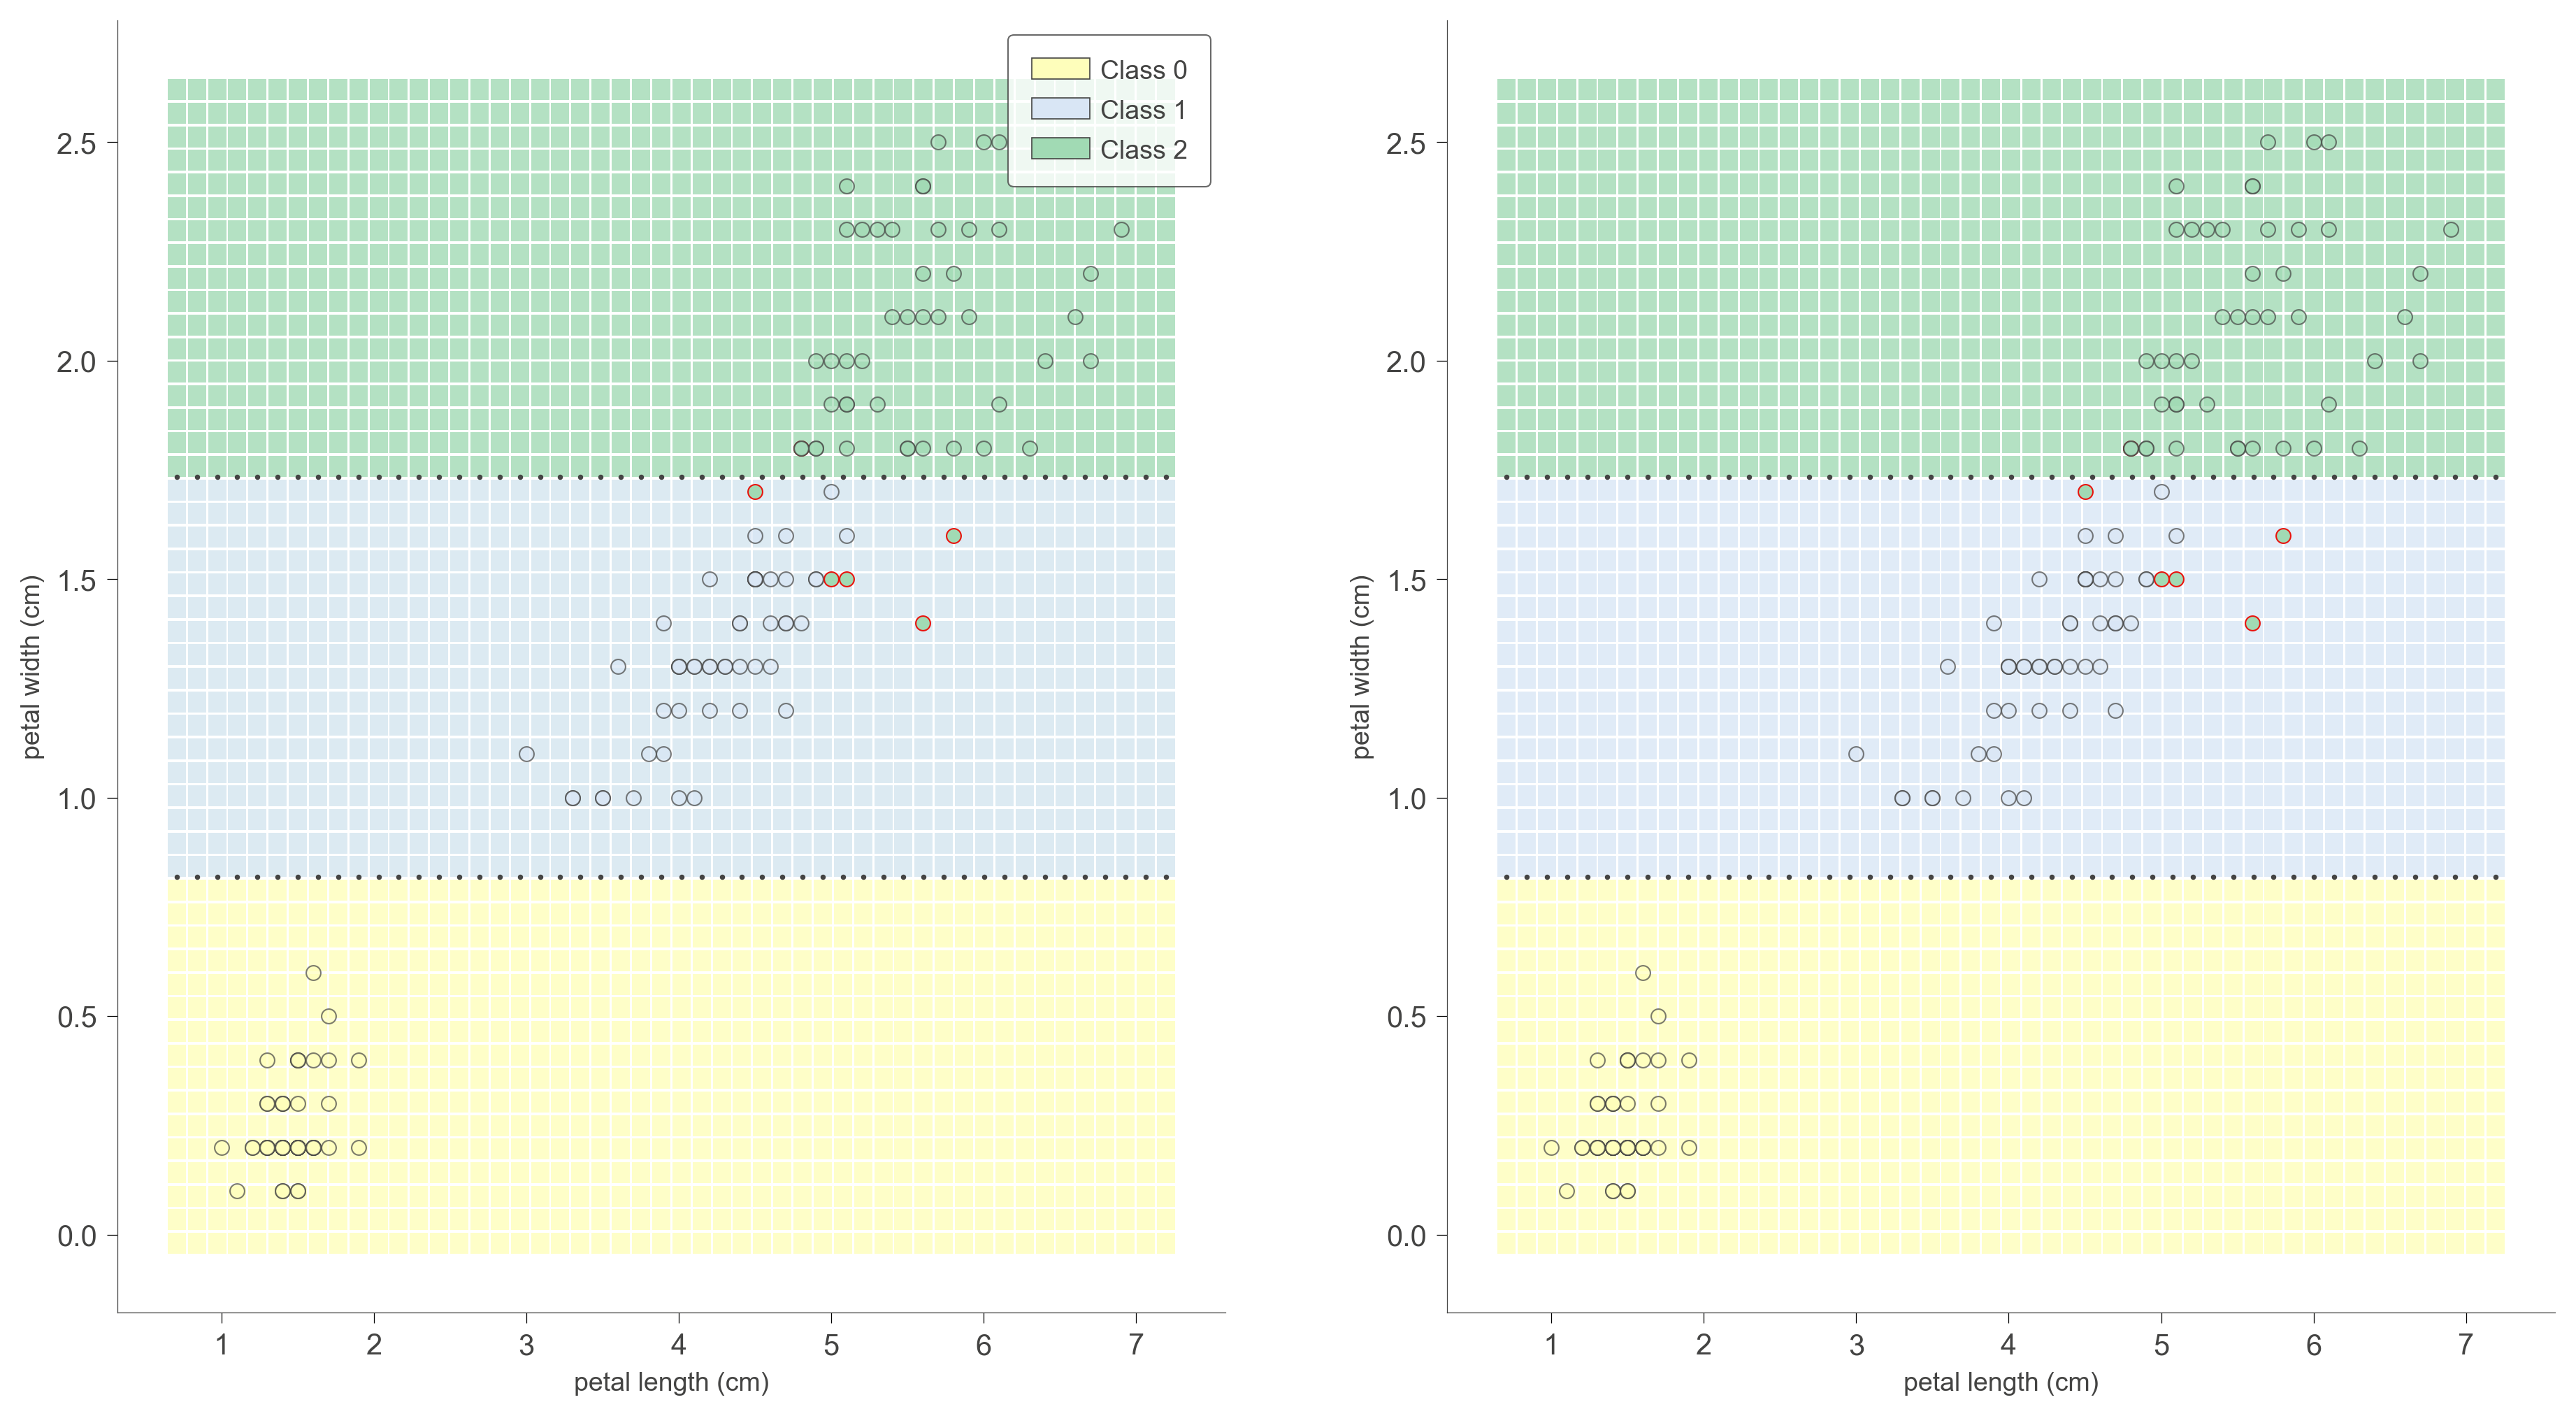

In [24]:
import matplotlib.pyplot as plt
from dtreeviz import decision_boundaries
fig,axes = plt.subplots(1,2, figsize=(15,8), dpi=300)
decision_boundaries(tree_clf, X, y, ax=axes[0],
       feature_names=iris.feature_names[2:])

decision_boundaries(tree_clf, X, y, ax=axes[1],
       # show classification regions not probabilities
       show=['instances', 'boundaries', 'misclassified'], 
       feature_names=iris.feature_names[2:])

plt.show()

Interesting insight: we'll get the same probability as long as we're in a certain leaf box. It doesn't matter if our new data point gets closer to the decision boundaries.

## The CART Training Algorithm

Scikit-Learn uses the Classification and Regression Tree (CART) algorithm to train decision trees (also called "growing" trees). The algorithm works by first splitting the training set by feature $k$ and threshold $t_k$.

It chooses $k$ and $t_k$ by searching for the $(k,t_k)$ that produce the purest subsets weighted by their size.

The following figure gives the loss function that CART tries to minimize:

$$J(k,t_k)=\frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$$

Where:
- $G_{left/right}$ measures the resulted impurity in the left/right subsets.
- $m_{left/right}$ correspond to the number of instances in the left/right subsets.

Once the CART algorithm successfully split the initial training data into two subsets, it does the same thing to both subsets. It stops recursing once it reaches the maximum allowed tree depth (the `max_depth` hyper-parameter), or if it cannot find a split that reduces impurity.

Other hyper-parameters that control stopping include: `min_samples_split`, `min_samples_leaf`, `min_weight_fraction_leaf`, `max_leaf_nodes`.

The CART algorithm is greedy in the sense that it doesn't care if its current split will lead to an optimal downstream leaf. It only cares about finding the best possible split at the current leaf. In that sense, it doesn't necessarily result in an optimal solution.

Unfortunately, finding the optimal tree is known to be an **NP-Complete** problem with a complexity of $O(exp(m))$.

## Computational Complexity

Making a prediction requires us to go from the root the final leaf.

Decision trees are approximately balanced, so traversing the decision tree require going through roughly $O(log_{2}(m))$. Since each node requires check the value of only one feature, the overall inference running time is $O(log_{2}(m))$. Which makes the algorrithm independent of the number of features. So predictions are really fast, even when the algorithm is dealing with a large number of features.

The training algorithm compares all features (except if `max_features` is set) on all samples at each node, this results in a training complexity of $O(n \times mlog_2(m))$.

For small training sets (less than a few thousands), scikit-learn can speed up training by presorting the data.

## Gini Impurity or Entropy?

### Gini


The gini impurity is calculated using the following formula:

$$GiniIndex=1–∑p^2_j$$

Where $p_j$
 is the probability of class j.

The gini impurity measures the frequency at which any element of the dataset will be mislabelled when it is randomly labeled.

The minimum value of the Gini Index is 0. This happens when the node is pure, this means that all the contained elements in the node are of one unique class. Therefore, this node will not be split again. Thus, the optimum split is chosen by the features with less Gini Index. Moreover, it gets the maximum value when the probability of the two classes are the same.

$$Gini_{min}=1–(1^2)=0$$

$$Gini_{max}=1–(0.5^2+0.5^2)=0.5$$


### Entropy

In information theory, entropy is zero when all messages are identical.

In ML, entropy is often used as an impurity measure. A set's entropy is zero when **it contains instances of only one class**.

The entropy is calculated using the following formula:

$$Entropy=–∑_j p_j⋅log_2 (p_j)$$

Where, as before, $p_j$
 is the probability of class j.

Entropy is a measure of information that indicates the disorder of the features with the target. Similar to the Gini Index, the optimum split is chosen by the feature with less entropy. It gets its maximum value when the probability of the two classes is the same and a node is pure when the entropy has its minimum value, which is 0:

$$Entropy_{min}=−1⋅log_2 (1)=0$$

$$Entropy_{max}=–0.5⋅log_2 (0.5)–0.5⋅log_2 (0.5)=1$$

There's no big difference between using Gini or Entropy to measure impurity. Gini impurity is slightly faster to compute. 

When they differ, Entropy tends to produce more balanced trees.


## Regularization Hyperparameters

**Decision Trees make very few assumptions about the training data**. If left unconstrained, a decision tree will adapt itself to perfectly fit the training data. which naturally leads to overfitting.

Such a model is often called a *non-parameteric model* because the number of parameters is not determined before training.

We can at least restrict the maximum depth of the decision tree, among other regularization hyper-parameters:


- `max_depth`:The first parameter to tune is max_depth. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data.


- `min_samples_split`: The minimum number of samples a node must have for it to split.
When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node.
We can clearly see that when we consider 100% of the samples at each node, the model cannot learn enough about the data. This is an underfitting case.

- `min_samples_leaf`: The minimum number of samples a leaf must have.
This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.
- `min_weight_fraction_leaf`: `mean_samples_leaf` as a fraction.
- `max_leaf_nodes`: the maximum number of leaf nodes.
- `max_features`: The maximum number of features that are evaluated for any split.

The following figure shows two decision trees trained on the same moon dataset, the left one represent an unconstrained trained decision tree, and the right one is regularized using the `min_samples_leaf` hyper-parameter:

<div style="text-align:center"><img style="width:50%" src="static/imgs/regularized_tree.png"></div>

## Regression

Decision Trees are also capable of performing regression tasks.

Let's try it using scikit-learn:

In [25]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [26]:
# First we want to generate a noisy quadratic dataset
X = np.linspace(start=0, stop=1, num=500)
y = (X-0.5)**2 + np.random.randn(500)/50.

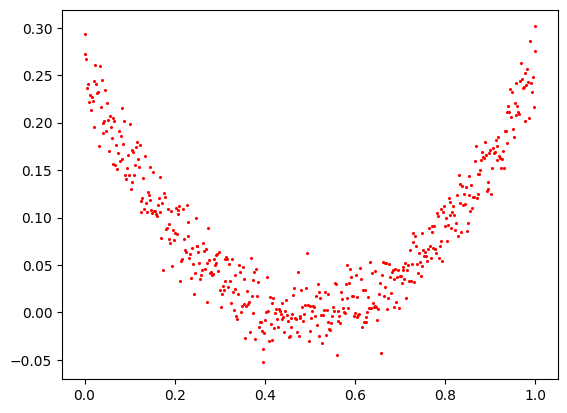

In [27]:
plt.scatter(X, y, s=1.5, c='red')

In [28]:
tree_reg = DecisionTreeRegressor(max_depth=2)

In [29]:
tree_reg.fit(X[..., None], y[..., None])

DecisionTreeRegressor(max_depth=2)

Let's check the resulting tree:

In [30]:
reg_viz_model = dtreeviz.model(tree_reg, X[..., None], y[..., None],
                target_name="trarget",
                feature_names=['x'],
            )

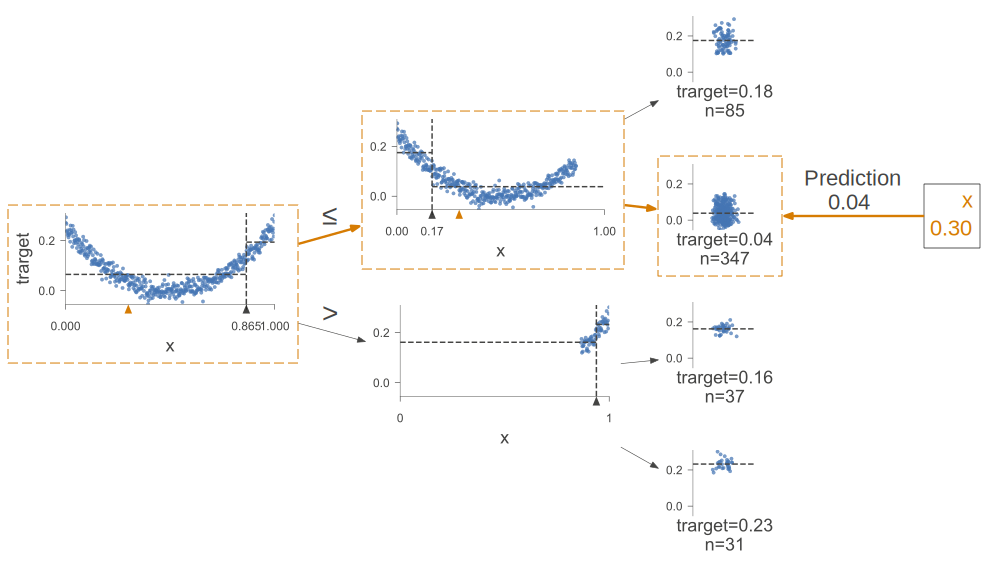

In [37]:
reg_viz_model.view(orientation='LR',scale=2,x=[0.3])

NameError: name 'reg' is not defined

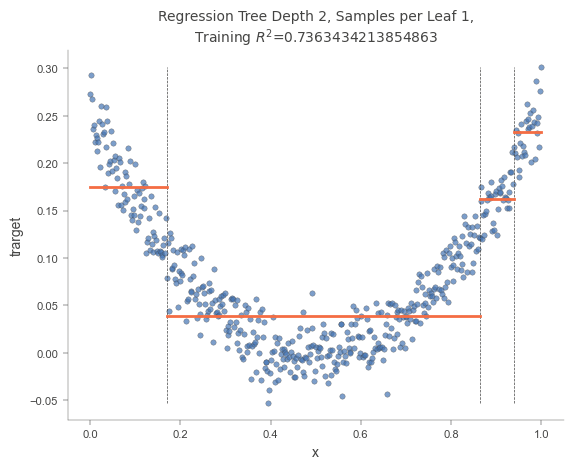

In [38]:
reg_viz_model.rtree_feature_space()

In [31]:
export_graphviz(tree_reg, 
                out_file='reg_tree.dot', 
                feature_names=['X'],
                class_names=['y'],
                rounded=True,
                filled=True)

In [32]:
! dot -Tpng reg_tree.dot -o static/imgs/reg_tree.png

<div style="text-align:center"><img style="width:50%" src="static/imgs/reg_tree.png"></div>

This tree looks very similar to the classification tree we built earlier. The main difference is that instead of predicting a class for each node, it predicts a value. the prediction represents the average target value for the group in the leaf.

As we increase the `max_depth` hyper-parameter, we provide the regression tree with more flexibility, the following showcases tree predictions in red:

<div style="text-align:center"><img style="width:66%" src="static/imgs/regression_trees.png"></div>

The CART algorithm works almost the same as before, but instead of searching for a split that minimizes impurity, it searches for a split that produce balanced samples per leaf and minimize $MSE$.

We show the cost function that the algorithm tries to minimize:

$$J(k,t_k)=\frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right} \\ MSE=\frac{1}{m}\sum_{i=1}^{m}(\hat{y}_{i}-y_{i})^{2}$$

Just like classification, regression trees are prone to overfitting the training data, without any regularization, we endup with the plot on the left, and setting `min_samples_leaf=10` produce a much reasonable model:

<div style="text-align:center"><img style="width:66%" src="static/imgs/regularizing_trees.png"></div>

## Instability

Decision Trees have a few limitations:
- Decision Trees love orthogonal decision boundaries, which makes them sensitive to training set rotation. One way to limit this problem is to use PCA (Principal Component Analysis) which often results in a better orientation of the training data.
- Decision Trees are sensitive to small variations in the training data. In fact, because scikit-learn uses stochastic optimization, you might get different models for the same training dataset.

Random Forests can solve this problem by averaging incoming prediction from many decision trees.

---